In [1]:
# Step1: Import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
# from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder










In [2]:
#Load Dataset
studentData = pd.read_csv("Records on Students Fails in Each Semester.csv")
studentData.head()

,NEWID,Failed_101,Failed_102,Failed_201,Failed_202,Failed_301
0,1,P,A,A,A,A
1,2,A,A,P,A,A
2,3,P,P,P,P,A
3,4,A,A,A,A,A
4,5,A,A,A,A,A


In [3]:
#Convert Dataset to Dataframes
le = LabelEncoder()
studentData = studentData.apply(le.fit_transform)
studentData.head()

,NEWID,Failed_101,Failed_102,Failed_201,Failed_202,Failed_301
0,0,1,0,0,0,0
1,1,0,0,1,0,0
2,2,1,1,1,1,0
3,3,0,0,0,0,0
4,4,0,0,0,0,0


In [6]:
#create model

X=studentData.iloc[:,:5]
print(X)
y=studentData['Failed_301']

model = SVC(kernel='linear')
model.fit(X, y)

     NEWID  Failed_101  Failed_102  Failed_201  Failed_202
0        0           1           0           0           0
1        1           0           0           1           0
2        2           1           1           1           1
3        3           0           0           0           0
4        4           0           0           0           0
..     ...         ...         ...         ...         ...
162    162           0           0           0           0
163    163           0           0           1           0
164    164           0           0           0           0
165    165           0           0           0           0
166    166           0           1           1           1

[167 rows x 5 columns]


SVC(kernel='linear')

In [9]:
#Check classifier accuracy on test data and see result 
predict_flower = model.predict(X)
print("Accuracy: ",accuracy_score(y, predict_flower))

Accuracy:  0.8862275449101796


In [11]:
#Show Report
print(confusion_matrix(y, predict_flower))
print(classification_report(y, predict_flower))


[[148   0]
 [ 19   0]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       148
           1       0.00      0.00      0.00        19

    accuracy                           0.89       167
   macro avg       0.44      0.50      0.47       167
weighted avg       0.79      0.89      0.83       167



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


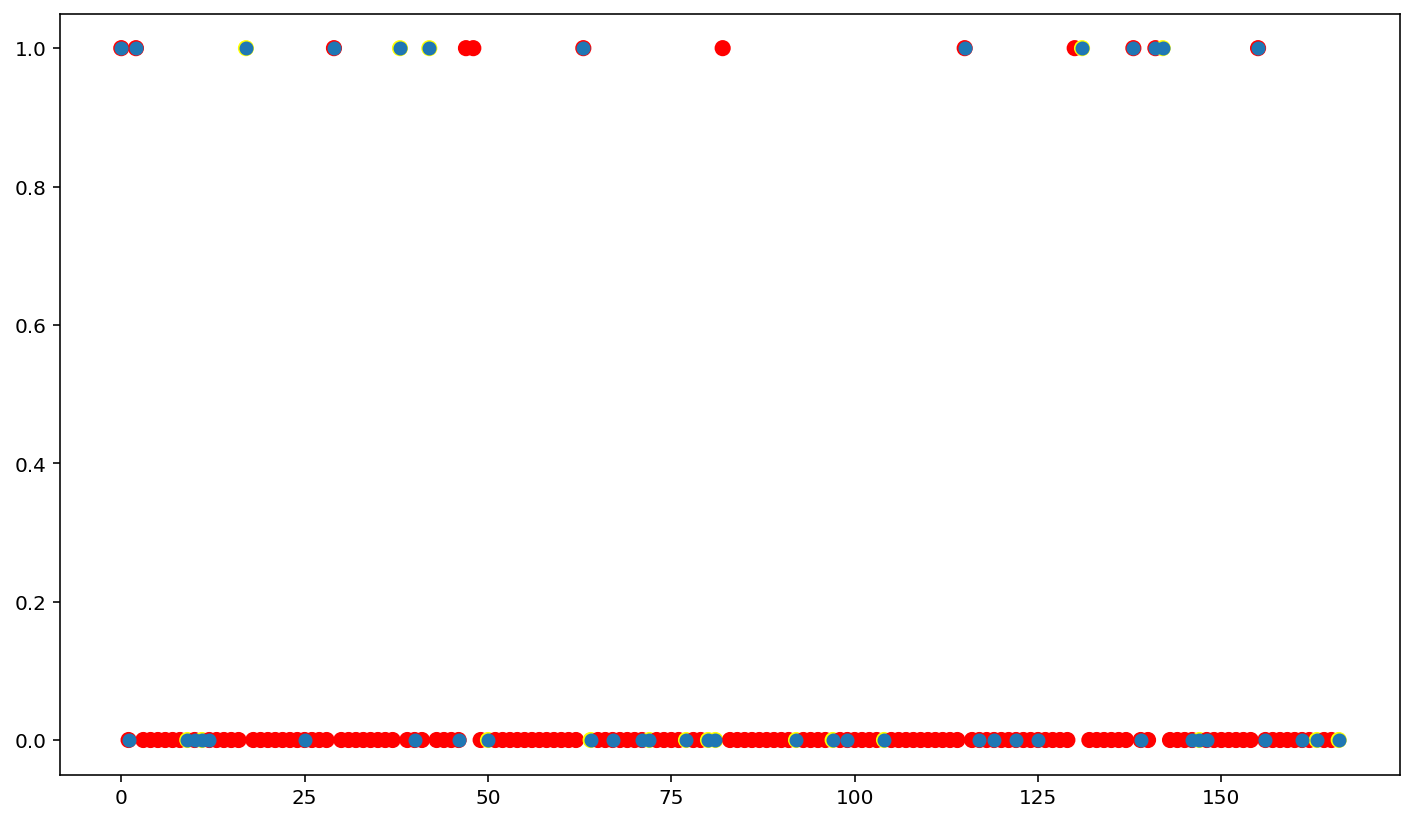

In [13]:

#Visualising Dataset

model.support_vectors_
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=50, cmap='autumn')
plt.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1])
